<a href="https://colab.research.google.com/github/akhadangi/EMstellar/blob/master/EM_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EM-net**

<font size = 4>This notebook represents the implementation of the [**EM-net**](https://www.biorxiv.org/content/10.1101/2020.02.03.933127v1). In addition to the EM-net, a variety of other deep learning methods have also been implemented including U-net, SegNet, ResNet and VGG. All these networks represent a similar encoding-decoding scheme for image segmentation. We have implemented a variety of evaluation metrics which allows you to obtain the maximum desirable performance. Moreover, this notebook offers K-fold cross valiadtion that can be used for training these networks when the training data is limited. Finally, this notebook will enable the users to use ensemble of desirable models for final stage inference on the test data.



---
<font size = 4>Papers related to this Notebook: 

- <font size = 3>**EM-net: Deep learning for electron microscopy image segmentation** by *Afshin Khadangi, Thomas Boudier, Vijay Rajagopal*  (https://www.biorxiv.org/content/10.1101/2020.02.03.933127v1)

- <font size = 3>**U-Net: Convolutional Networks for Biomedical Image Segmentation** by *Olaf Ronneberger, Philipp Fischer, Thomas Brox*  (https://arxiv.org/abs/1505.04597)

- <font size = 3>**Very Deep Convolutional Networks for Large-Scale Image Recognition** by *Karen Simonyan, Andrew Zisserman*  (https://arxiv.org/abs/1409.1556)

- <font size = 3>**SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation** by *Vijay Badrinarayanan, Alex Kendall, Roberto Cipolla*  (https://arxiv.org/abs/1511.00561)

- <font size = 3>**Deep Residual Learning for Image Recognition** by *Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun*  (https://arxiv.org/abs/1512.03385)

<font size = 4>**Please cite** [**this original paper**](https://www.biorxiv.org/content/10.1101/2020.02.03.933127v1) **when using or developing this notebook.**

<font size = 3> This notebook is adapted and developed from the [ZeroCostDL4Mic](https://github.com/HenriquesLab/ZeroCostDL4Mic).

# **How to use?!**

---

<font size = 4>We have provided the instructions for the usage of this Notebook in the following YouTube link:
  - [**YoutTube Video**](https://www.youtube.com): Walk through the pipeline including data upload, training and deploying the trained model.


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 3> **Important** Make sure that image size both in $x$ and $y$ are divisible by 32. Ideally for GPU training it should be a number of power of 2 and divisible by 32, for example:
*   $128$ x $128$
*   $256$ x $256$
*   $512$ x $512$
*   ...
<font size = 4>

1. Create folders in the following format and upload them into your google drive:
*   **drive**
    - source
      - img_1.tif, img_2.tif, ...
    - target
      - img_1.tif, img_2.tif, ...
    - test


2. Place the input images (e.g. the images you want the model to learn to segment) in the **source** folder and your desired output (e.g. segmentation maps) into the **target** folder. Corresponding **source and target images** must have the **same name**.
3. Place all your test images in the **prediction** folder. This folder contains the images that we want to use the trained network to segment them. Hence, it is different from the validation data as the validation data will be sampled from the training data that you have uploaded to the **source** folder.


## **1.1 Change the Runtime**
---

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit (GPU)*


In [ ]:
#@title ##Run this cell to check if you have GPU access
%tensorflow_version 1.x

import tensorflow as tf
# import os
# try:
#   device_name = os.environ['COLAB_TPU_ADDR']
#   TPU_ADDRESS = 'grpc://' + device_name
#   print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#   print('TPU not found')
#   print('You do n have TPU access.') 
#   print('Did you change your runtime ?') 
#   print('If the runtime setting is correct then Google did not allocate a GPU for your session')
#   print('Expect slow performance. To access GPU try reconnecting later')

if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

TensorFlow 1.x selected.
You have GPU access


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3361992724357764749, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15773053607611689412
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 93318318442743227
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11263916734353565286
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install EM-net Dependencies**
---

In [ ]:
#@markdown ##Play to install EM-net dependencies
import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
print("Tensorflow enabled.")

import warnings
warnings.filterwarnings("ignore")
#We enforce the keras==2.2.4 release to ensure that the notebook continues working even if keras is updated.
#We will use Rectified Adam as the optimiser

!pip install keras==2.2.4
!pip install data
!pip install keras-rectified-adam

from keras import models
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as keras
from data import *
from __future__ import print_function
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans
from skimage import img_as_ubyte
from matplotlib.pyplot import imread
from pathlib import Path
import PIL
from keras_radam import RAdam


"""Python utilities required by Keras."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import binascii
import numpy as np

import time
import sys
import six
import marshal
import types as python_types
import inspect
import codecs
import collections

_GLOBAL_CUSTOM_OBJECTS = {}


class CustomObjectScope(object):
    """Provides a scope that changes to `_GLOBAL_CUSTOM_OBJECTS` cannot escape.

    Code within a `with` statement will be able to access custom objects
    by name. Changes to global custom objects persist
    within the enclosing `with` statement. At end of the `with` statement,
    global custom objects are reverted to state
    at beginning of the `with` statement.

    # Example

    Consider a custom object `MyObject` (e.g. a class):

    ```python
        with CustomObjectScope({'MyObject':MyObject}):
            layer = Dense(..., kernel_regularizer='MyObject')
            # save, load, etc. will recognize custom object by name
    ```
    """

    def __init__(self, *args):
        self.custom_objects = args
        self.backup = None

    def __enter__(self):
        self.backup = _GLOBAL_CUSTOM_OBJECTS.copy()
        for objects in self.custom_objects:
            _GLOBAL_CUSTOM_OBJECTS.update(objects)
        return self

    def __exit__(self, *args, **kwargs):
        _GLOBAL_CUSTOM_OBJECTS.clear()
        _GLOBAL_CUSTOM_OBJECTS.update(self.backup)


def custom_object_scope(*args):
    """Provides a scope that changes to `_GLOBAL_CUSTOM_OBJECTS` cannot escape.

    Convenience wrapper for `CustomObjectScope`.
    Code within a `with` statement will be able to access custom objects
    by name. Changes to global custom objects persist
    within the enclosing `with` statement. At end of the `with` statement,
    global custom objects are reverted to state
    at beginning of the `with` statement.

    # Example

    Consider a custom object `MyObject`

    ```python
        with custom_object_scope({'MyObject':MyObject}):
            layer = Dense(..., kernel_regularizer='MyObject')
            # save, load, etc. will recognize custom object by name
    ```

    # Arguments
        *args: Variable length list of dictionaries of name,
            class pairs to add to custom objects.

    # Returns
        Object of type `CustomObjectScope`.
    """
    return CustomObjectScope(*args)


def get_custom_objects():
    """Retrieves a live reference to the global dictionary of custom objects.

    Updating and clearing custom objects using `custom_object_scope`
    is preferred, but `get_custom_objects` can
    be used to directly access `_GLOBAL_CUSTOM_OBJECTS`.

    # Example

    ```python
        get_custom_objects().clear()
        get_custom_objects()['MyObject'] = MyObject
    ```

    # Returns
        Global dictionary of names to classes (`_GLOBAL_CUSTOM_OBJECTS`).
    """
    return _GLOBAL_CUSTOM_OBJECTS


def serialize_keras_object(instance):
    if instance is None:
        return None
    if hasattr(instance, 'get_config'):
        return {
            'class_name': instance.__class__.__name__,
            'config': instance.get_config()
        }
    if hasattr(instance, '__name__'):
        return instance.__name__
    else:
        raise ValueError('Cannot serialize', instance)


def deserialize_keras_object(identifier, module_objects=None,
                             custom_objects=None,
                             printable_module_name='object'):
    if identifier is None:
        return None
    if isinstance(identifier, dict):
        # In this case we are dealing with a Keras config dictionary.
        config = identifier
        if 'class_name' not in config or 'config' not in config:
            raise ValueError('Improper config format: ' + str(config))
        class_name = config['class_name']
        if custom_objects and class_name in custom_objects:
            cls = custom_objects[class_name]
        elif class_name in _GLOBAL_CUSTOM_OBJECTS:
            cls = _GLOBAL_CUSTOM_OBJECTS[class_name]
        else:
            module_objects = module_objects or {}
            cls = module_objects.get(class_name)
            if cls is None:
                raise ValueError('Unknown ' + printable_module_name +
                                 ': ' + class_name)
        if hasattr(cls, 'from_config'):
            custom_objects = custom_objects or {}
            if has_arg(cls.from_config, 'custom_objects'):
                return cls.from_config(
                    config['config'],
                    custom_objects=dict(list(_GLOBAL_CUSTOM_OBJECTS.items()) +
                                        list(custom_objects.items())))
            with CustomObjectScope(custom_objects):
                return cls.from_config(config['config'])
        else:
            # Then `cls` may be a function returning a class.
            # in this case by convention `config` holds
            # the kwargs of the function.
            custom_objects = custom_objects or {}
            with CustomObjectScope(custom_objects):
                return cls(**config['config'])
    elif isinstance(identifier, six.string_types):
        function_name = identifier
        if custom_objects and function_name in custom_objects:
            fn = custom_objects.get(function_name)
        elif function_name in _GLOBAL_CUSTOM_OBJECTS:
            fn = _GLOBAL_CUSTOM_OBJECTS[function_name]
        else:
            fn = module_objects.get(function_name)
            if fn is None:
                raise ValueError('Unknown ' + printable_module_name +
                                 ':' + function_name)
        return fn
    else:
        raise ValueError('Could not interpret serialized ' +
                         printable_module_name + ': ' + identifier)


def func_dump(func):
    """Serializes a user defined function.

    # Arguments
        func: the function to serialize.

    # Returns
        A tuple `(code, defaults, closure)`.
    """
    raw_code = marshal.dumps(func.__code__)
    code = codecs.encode(raw_code, 'base64').decode('ascii')
    defaults = func.__defaults__
    if func.__closure__:
        closure = tuple(c.cell_contents for c in func.__closure__)
    else:
        closure = None
    return code, defaults, closure


def func_load(code, defaults=None, closure=None, globs=None):
    """Deserializes a user defined function.

    # Arguments
        code: bytecode of the function.
        defaults: defaults of the function.
        closure: closure of the function.
        globs: dictionary of global objects.

    # Returns
        A function object.
    """
    if isinstance(code, (tuple, list)):  # unpack previous dump
        code, defaults, closure = code
        if isinstance(defaults, list):
            defaults = tuple(defaults)

    def ensure_value_to_cell(value):
        """Ensures that a value is converted to a python cell object.

        # Arguments
            value: Any value that needs to be casted to the cell type

        # Returns
            A value wrapped as a cell object (see function "func_load")

        """
        def dummy_fn():
            value  # just access it so it gets captured in .__closure__

        cell_value = dummy_fn.__closure__[0]
        if not isinstance(value, type(cell_value)):
            return cell_value
        else:
            return value

    if closure is not None:
        closure = tuple(ensure_value_to_cell(_) for _ in closure)
    try:
        raw_code = codecs.decode(code.encode('ascii'), 'base64')
        code = marshal.loads(raw_code)
    except (UnicodeEncodeError, binascii.Error, ValueError):
        # backwards compatibility for models serialized prior to 2.1.2
        raw_code = code.encode('raw_unicode_escape')
        code = marshal.loads(raw_code)
    if globs is None:
        globs = globals()
    return python_types.FunctionType(code, globs,
                                     name=code.co_name,
                                     argdefs=defaults,
                                     closure=closure)


def getargspec(fn):
    """Python 2/3 compatible `getargspec`.

    Calls `getfullargspec` and assigns args, varargs,
    varkw, and defaults to a python 2/3 compatible `ArgSpec`.
    The parameter name 'varkw' is changed to 'keywords' to fit the
    `ArgSpec` struct.

    # Arguments
        fn: the target function to inspect.

    # Returns
        An ArgSpec with args, varargs, keywords, and defaults parameters
        from FullArgSpec.
    """
    if sys.version_info < (3,):
        arg_spec = inspect.getargspec(fn)
    else:
        full_arg_spec = inspect.getfullargspec(fn)
        arg_spec = inspect.ArgSpec(
            args=full_arg_spec.args,
            varargs=full_arg_spec.varargs,
            keywords=full_arg_spec.varkw,
            defaults=full_arg_spec.defaults)
    return arg_spec


def has_arg(fn, name, accept_all=False):
    """Checks if a callable accepts a given keyword argument.

    For Python 2, checks if there is an argument with the given name.

    For Python 3, checks if there is an argument with the given name, and
    also whether this argument can be called with a keyword (i.e. if it is
    not a positional-only argument).

    # Arguments
        fn: Callable to inspect.
        name: Check if `fn` can be called with `name` as a keyword argument.
        accept_all: What to return if there is no parameter called `name`
                    but the function accepts a `**kwargs` argument.

    # Returns
        bool, whether `fn` accepts a `name` keyword argument.
    """
    if sys.version_info < (3,):
        arg_spec = inspect.getargspec(fn)
        if accept_all and arg_spec.keywords is not None:
            return True
        return (name in arg_spec.args)
    elif sys.version_info < (3, 3):
        arg_spec = inspect.getfullargspec(fn)
        if accept_all and arg_spec.varkw is not None:
            return True
        return (name in arg_spec.args or
                name in arg_spec.kwonlyargs)
    else:
        signature = inspect.signature(fn)
        parameter = signature.parameters.get(name)
        if parameter is None:
            if accept_all:
                for param in signature.parameters.values():
                    if param.kind == inspect.Parameter.VAR_KEYWORD:
                        return True
            return False
        return (parameter.kind in (inspect.Parameter.POSITIONAL_OR_KEYWORD,
                                   inspect.Parameter.KEYWORD_ONLY))


class Progbar(object):
    """Displays a progress bar.

    # Arguments
        target: Total number of steps expected, None if unknown.
        width: Progress bar width on screen.
        verbose: Verbosity mode, 0 (silent), 1 (verbose), 2 (semi-verbose)
        stateful_metrics: Iterable of string names of metrics that
            should *not* be averaged over time. Metrics in this list
            will be displayed as-is. All others will be averaged
            by the progbar before display.
        interval: Minimum visual progress update interval (in seconds).
    """

    def __init__(self, target, width=30, verbose=1, interval=0.05,
                 stateful_metrics=None):
        self.target = target
        self.width = width
        self.verbose = verbose
        self.interval = interval
        if stateful_metrics:
            self.stateful_metrics = set(stateful_metrics)
        else:
            self.stateful_metrics = set()

        self._dynamic_display = ((hasattr(sys.stdout, 'isatty') and
                                  sys.stdout.isatty()) or
                                 'ipykernel' in sys.modules)
        self._total_width = 0
        self._seen_so_far = 0
        self._values = collections.OrderedDict()
        self._start = time.time()
        self._last_update = 0

    def update(self, current, values=None):
        """Updates the progress bar.

        # Arguments
            current: Index of current step.
            values: List of tuples:
                `(name, value_for_last_step)`.
                If `name` is in `stateful_metrics`,
                `value_for_last_step` will be displayed as-is.
                Else, an average of the metric over time will be displayed.
        """
        values = values or []
        for k, v in values:
            if k not in self.stateful_metrics:
                if k not in self._values:
                    self._values[k] = [v * (current - self._seen_so_far),
                                       current - self._seen_so_far]
                else:
                    self._values[k][0] += v * (current - self._seen_so_far)
                    self._values[k][1] += (current - self._seen_so_far)
            else:
                # Stateful metrics output a numeric value.  This representation
                # means "take an average from a single value" but keeps the
                # numeric formatting.
                self._values[k] = [v, 1]
        self._seen_so_far = current

        now = time.time()
        info = ' - %.0fs' % (now - self._start)
        if self.verbose == 1:
            if (now - self._last_update < self.interval and
                    self.target is not None and current < self.target):
                return

            prev_total_width = self._total_width
            if self._dynamic_display:
                sys.stdout.write('\b' * prev_total_width)
                sys.stdout.write('\r')
            else:
                sys.stdout.write('\n')

            if self.target is not None:
                numdigits = int(np.floor(np.log10(self.target))) + 1
                barstr = '%%%dd/%d [' % (numdigits, self.target)
                bar = barstr % current
                prog = float(current) / self.target
                prog_width = int(self.width * prog)
                if prog_width > 0:
                    bar += ('=' * (prog_width - 1))
                    if current < self.target:
                        bar += '>'
                    else:
                        bar += '='
                bar += ('.' * (self.width - prog_width))
                bar += ']'
            else:
                bar = '%7d/Unknown' % current

            self._total_width = len(bar)
            sys.stdout.write(bar)

            if current:
                time_per_unit = (now - self._start) / current
            else:
                time_per_unit = 0
            if self.target is not None and current < self.target:
                eta = time_per_unit * (self.target - current)
                if eta > 3600:
                    eta_format = ('%d:%02d:%02d' %
                                  (eta // 3600, (eta % 3600) // 60, eta % 60))
                elif eta > 60:
                    eta_format = '%d:%02d' % (eta // 60, eta % 60)
                else:
                    eta_format = '%ds' % eta

                info = ' - ETA: %s' % eta_format
            else:
                if time_per_unit >= 1:
                    info += ' %.0fs/step' % time_per_unit
                elif time_per_unit >= 1e-3:
                    info += ' %.0fms/step' % (time_per_unit * 1e3)
                else:
                    info += ' %.0fus/step' % (time_per_unit * 1e6)

            for k in self._values:
                info += ' - %s:' % k
                if isinstance(self._values[k], list):
                    avg = np.mean(
                        self._values[k][0] / max(1, self._values[k][1]))
                    if abs(avg) > 1e-3:
                        info += ' %.4f' % avg
                    else:
                        info += ' %.4e' % avg
                else:
                    info += ' %s' % self._values[k]

            self._total_width += len(info)
            if prev_total_width > self._total_width:
                info += (' ' * (prev_total_width - self._total_width))

            if self.target is not None and current >= self.target:
                info += '\n'

            sys.stdout.write(info)
            sys.stdout.flush()

        elif self.verbose == 2:
            if self.target is None or current >= self.target:
                for k in self._values:
                    info += ' - %s:' % k
                    avg = np.mean(
                        self._values[k][0] / max(1, self._values[k][1]))
                    if avg > 1e-3:
                        info += ' %.4f' % avg
                    else:
                        info += ' %.4e' % avg
                info += '\n'

                sys.stdout.write(info)
                sys.stdout.flush()

        self._last_update = now

    def add(self, n, values=None):
        self.update(self._seen_so_far + n, values)


def to_list(x, allow_tuple=False):
    """Normalizes a list/tensor into a list.

    If a tensor is passed, we return
    a list of size 1 containing the tensor.

    # Arguments
        x: target object to be normalized.
        allow_tuple: If False and x is a tuple,
            it will be converted into a list
            with a single element (the tuple).
            Else converts the tuple to a list.

    # Returns
        A list.
    """
    if isinstance(x, list):
        return x
    if allow_tuple and isinstance(x, tuple):
        return list(x)
    return [x]


def unpack_singleton(x):
    """Gets the first element if the iterable has only one value.

    Otherwise return the iterable.

    # Argument
        x: A list or tuple.

    # Returns
        The same iterable or the first element.
    """
    if len(x) == 1:
        return x[0]
    return x


def object_list_uid(object_list):
    object_list = to_list(object_list)
    return ', '.join([str(abs(id(x))) for x in object_list])


def is_all_none(iterable_or_element):
    iterable = to_list(iterable_or_element, allow_tuple=True)
    for element in iterable:
        if element is not None:
            return False
    return True


def slice_arrays(arrays, start=None, stop=None):
    """Slices an array or list of arrays.

    This takes an array-like, or a list of
    array-likes, and outputs:
        - arrays[start:stop] if `arrays` is an array-like
        - [x[start:stop] for x in arrays] if `arrays` is a list

    Can also work on list/array of indices: `_slice_arrays(x, indices)`

    # Arguments
        arrays: Single array or list of arrays.
        start: can be an integer index (start index)
            or a list/array of indices
        stop: integer (stop index); should be None if
            `start` was a list.

    # Returns
        A slice of the array(s).
    """
    if arrays is None:
        return [None]
    elif isinstance(arrays, list):
        if hasattr(start, '__len__'):
            # hdf5 datasets only support list objects as indices
            if hasattr(start, 'shape'):
                start = start.tolist()
            return [None if x is None else x[start] for x in arrays]
        else:
            return [None if x is None else x[start:stop] for x in arrays]
    else:
        if hasattr(start, '__len__'):
            if hasattr(start, 'shape'):
                start = start.tolist()
            return arrays[start]
        elif hasattr(start, '__getitem__'):
            return arrays[start:stop]
        else:
            return [None]


def transpose_shape(shape, target_format, spatial_axes):
    """Converts a tuple or a list to the correct `data_format`.

    It does so by switching the positions of its elements.

    # Arguments
        shape: Tuple or list, often representing shape,
            corresponding to `'channels_last'`.
        target_format: A string, either `'channels_first'` or `'channels_last'`.
        spatial_axes: A tuple of integers.
            Correspond to the indexes of the spatial axes.
            For example, if you pass a shape
            representing (batch_size, timesteps, rows, cols, channels),
            then `spatial_axes=(2, 3)`.

    # Returns
        A tuple or list, with the elements permuted according
        to `target_format`.

    # Example
    ```python
        >>> from keras.utils.generic_utils import transpose_shape
        >>> transpose_shape((16, 128, 128, 32),'channels_first', spatial_axes=(1, 2))
        (16, 32, 128, 128)
        >>> transpose_shape((16, 128, 128, 32), 'channels_last', spatial_axes=(1, 2))
        (16, 128, 128, 32)
        >>> transpose_shape((128, 128, 32), 'channels_first', spatial_axes=(0, 1))
        (32, 128, 128)
    ```

    # Raises
        ValueError: if `value` or the global `data_format` invalid.
    """
    if target_format == 'channels_first':
        new_values = shape[:spatial_axes[0]]
        new_values += (shape[-1],)
        new_values += tuple(shape[x] for x in spatial_axes)

        if isinstance(shape, list):
            return list(new_values)
        return new_values
    elif target_format == 'channels_last':
        return shape
    else:
        raise ValueError('The `data_format` argument must be one of '
                         '"channels_first", "channels_last". Received: ' +
                         str(target_format))



from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.layers import Layer
from keras.layers import InputSpec
from keras import backend as K
from keras.legacy import interfaces

class TLU(Layer):
    """Trainable Rectified Linear Unit (TLU).

    It follows:
    `f(x) = alpha * x for x < 0`,
    `f(x) = beta * x for x >= 0`,
    where `alpha` and `beta` is a learned array with the same shape as x.

    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.

    # Output shape
        Same shape as the input.

    # Arguments
        alpha_initializer: initializer function for the weights.
        alpha_regularizer: regularizer for the weights.
        alpha_constraint: constraint for the weights.
        beta_initializer: initializer function for the weights.
        beta_regularizer: regularizer for the weights.
        beta_constraint: constraint for the weights.
        shared_axes: the axes along which to share learnable
            parameters for the activation function.
            For example, if the incoming feature maps
            are from a 2D convolution
            with output shape `(batch, height, width, channels)`,
            and you wish to share parameters across space
            so that each filter only has one set of parameters,
            set `shared_axes=[1, 2]`.

    # References
        - [EM-net: Deep learning for electron microscopy image segmentation
         by Afshin Khadangi, Thomas Boudier, Vijay Rajagopal]
         (https://www.biorxiv.org/content/10.1101/2020.02.03.933127v1)
    """

    @interfaces.legacy_prelu_support
    def __init__(self, alpha_initializer='zeros',
                 beta_initializer='ones',
                 alpha_regularizer=None,
                 alpha_constraint=None,
                 beta_regularizer=None,
                 beta_constraint=None,
                 shared_axes=None,
                 **kwargs):
        super(TLU, self).__init__(**kwargs)
        self.supports_masking = True
        self.alpha_initializer = initializers.get(alpha_initializer)
        self.alpha_regularizer = regularizers.get(alpha_regularizer)
        self.alpha_constraint = constraints.get(alpha_constraint)
        self.beta_initializer = initializers.get(beta_initializer)
        self.beta_regularizer = regularizers.get(beta_regularizer)
        self.beta_constraint = constraints.get(beta_constraint)
        if shared_axes is None:
            self.shared_axes = None
        else:
            self.shared_axes = to_list(shared_axes, allow_tuple=True)

    def build(self, input_shape):
        param_shape = list(input_shape[1:])
        self.param_broadcast = [False] * len(param_shape)
        if self.shared_axes is not None:
            for i in self.shared_axes:
                param_shape[i - 1] = 1
                self.param_broadcast[i - 1] = True
        self.alpha = self.add_weight(shape=param_shape,
                                     name='alpha',
                                     initializer=self.alpha_initializer,
                                     regularizer=self.alpha_regularizer,
                                     constraint=self.alpha_constraint)
        self.beta = self.add_weight(shape=param_shape,
                                     name='beta',
                                     initializer=self.beta_initializer,
                                     regularizer=self.beta_regularizer,
                                     constraint=self.beta_constraint)
        # Set input spec
        axes = {}
        if self.shared_axes:
            for i in range(1, len(input_shape)):
                if i not in self.shared_axes:
                    axes[i] = input_shape[i]
        self.input_spec = InputSpec(ndim=len(input_shape), axes=axes)
        self.built = True

    def call(self, inputs, mask=None):
        pos = self.beta * K.relu(inputs)
        if K.backend() == 'theano':
            neg = (K.pattern_broadcast(self.alpha, self.param_broadcast) *
                   (inputs - K.abs(inputs)) * 0.5)
        else:
            neg = -self.alpha * K.relu(-inputs)
        return pos + neg

    def get_config(self):
        config = {
            'alpha_initializer': initializers.serialize(self.alpha_initializer),
            'alpha_regularizer': regularizers.serialize(self.alpha_regularizer),
            'alpha_constraint': constraints.serialize(self.alpha_constraint),
            'beta_initializer': initializers.serialize(self.beta_initializer),
            'beta_regularizer': regularizers.serialize(self.beta_regularizer),
            'beta_constraint': constraints.serialize(self.beta_constraint),
            'shared_axes': self.shared_axes
        }
        base_config = super(TLU, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

1.15.2
Tensorflow enabled.
     |████████████████████████████████| 317kB 3.3MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
  Created wheel for data: filename=data-0.4-cp36-none-any.whl size=7247 sha256=d88681438c9fe41a74f8c2f227e708979d52b5627d39a8e4fadcaf6326b820b3
  Stored in directory: /root/.cache/pip/wheels/f6/09/e5/5afbc45fb0de471541092c7cd8b48d3483be68b1890955e6b9
Successfully built data
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=470812bfb20b7dfab3badeaed1710c97eebbceb00a4accb03b8d668441d6b293
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


Using TensorFlow backend.


# **3. Select your parameters and paths**

---

##**3.1. Parameters and paths**
---

<font size = 5> **Paths for training data and models**

<font size = 4>**`Training_source`, `Training_target`:** These are the folders containing your source (e.g. EM images) and target files (segmentation masks). Enter the path to the source and target images for training. **These should be located in the same parent folder.**

<font size = 4>**`Patch_width`, `Patch_height`:** Training deep neural networks requires lots of computaional resources including **memory**. Feeding larger image data size to the network can exhaust the resources. Such a limitation can be handled by reducing the input image size. Hence, we have provided **patch training** which enables the user to overcome this limitation. You can simply upload the training images with any size, and set the patch size by controlling these two parameters. **The larger patch size will require higher memory.**

<font size = 4>**`model_name`:** Use only my_model -style, not my-model. If you want to use a previously trained model, enter the name of the pretrained model (which should be contained in the trained_model -folder after training).

<font size = 4>**`model_path`**: Enter the path of the folder where you want to save your model.

**Make sure the directories exist before entering them!**

<font size = 5> **Select training parameters**

<font size = 4>**`epochs`**: Choose more epochs for larger training sets. Observing how much the loss reduces between epochs during training may help determine the optimal value. **Default: 50**

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`batch_size`**: This parameter describes the amount of images that are loaded into the network per step. Smaller batchsizes may improve training performance slightly but may increase training time. If the notebook crashes while loading the dataset this can be due to a too large batch size. Decrease the number in this case. **Default: 2**

<font size = 4>**`loss_functions`**: Training performance depends strongly on the loss function. To find out more about losses, see: https://keras.io/losses/. **Default: binary_crossentropy**

<font size = 4>**`optimizer`**: Training performance depends strongly on the optimiser as well. To find out more about optimizers, see: https://keras.io/optimizers/. **Default: Rectified Adam**




In [ ]:
#@markdown ###Path to training images:
import shutil
Training_source = '/content/gdrive/My Drive/Zero/ISBI_source' #@param {type:"string"}

#We find the name of the base_directory (before reassigning the Training_source name to just a name)
path = Path(Training_source)
base_directory = '/'+(str(path.parent))

#We reassign Training_source to just include the name of the folder, instead of the whole path.
Training_source = os.path.basename(os.path.normpath(Training_source))


Training_target = '/content/gdrive/My Drive/Zero/ISBI_mask' #@param {type:"string"}
#We reassign Training_target to just include the name of the folder, instead of the whole path.
Training_target = os.path.basename(os.path.normpath(Training_target))

#We define the patch width and height to train the networks using extracted patches
Patch_width = 256#@param {type:"slider", min:64, max:512, step:64}
Patch_height = 256#@param {type:"slider", min:64, max:512, step:64}
Patch_source = base_directory+'/'+'Patch_source'
Patch_target = base_directory+'/'+'Patch_target'

#Cleaning up pre-existing directories, if any!
if os.path.exists(Patch_source):
  shutil.rmtree(Patch_source)
if os.path.exists(Patch_target):
  shutil.rmtree(Patch_target)

#Creating new directories
os.mkdir(Patch_source)
os.mkdir(Patch_target)

images__ = os.listdir(base_directory+'/'+Training_source)
I__ = io.imread(base_directory+'/'+Training_source+'/'+images__[0])

parent_patches_img = np.empty([0,I__.shape[0], I__.shape[1]])
parent_patches_mask = np.empty([0,I__.shape[0], I__.shape[1]])
#function defined to extract ordered patches, not random
data_mode = False
def extract_ordered(full_imgs, patch_h, patch_w):
    img_h = full_imgs.shape[1]  #height of the full image
    img_w = full_imgs.shape[2] #width of the full image
    N_patches_h = int(img_h/patch_h) #round to lowest int
    if (img_h%patch_h != 0):
        print ("warning: " +str(N_patches_h) +" patches in height, with about " +str(img_h%patch_h) +" pixels left over")
    N_patches_w = int(img_w/patch_w) #round to lowest int
    if (img_h%patch_h != 0):
        print ("warning: " +str(N_patches_w) +" patches in width, with about " +str(img_w%patch_w) +" pixels left over")
    print ("number of patches per image: " +str(N_patches_h*N_patches_w))
    N_patches_tot = (N_patches_h*N_patches_w)*full_imgs.shape[0]
    if (data_mode):
        patches = np.empty((N_patches_tot,patch_h,patch_w,th), dtype="float32")
    else:
        patches = np.empty((N_patches_tot,patch_h,patch_w), dtype="float32")
    iter_tot = 0   #iter over the total number of patches (N_patches)
    for i in range(full_imgs.shape[0]):  #loop over the full images
        for h in range(N_patches_h):
            for w in range(N_patches_w):
                if (data_mode):
                    patch = full_imgs[i,h*patch_h:(h*patch_h)+patch_h,w*patch_w:(w*patch_w)+patch_w,:]
                    patches[iter_tot]=patch
                    iter_tot +=1   #total
                else:
                    patch = full_imgs[i,h*patch_h:(h*patch_h)+patch_h,w*patch_w:(w*patch_w)+patch_w]
                    patches[iter_tot]=patch
                    iter_tot +=1   #total
    assert (iter_tot==N_patches_tot)
    return patches

patches_list = []
#Read images from sources
for file in os.listdir(base_directory+'/'+Training_source):
  img = io.imread(os.path.join(base_directory+'/'+Training_source, file),as_gray=True)
  patches_list.append(img)
parent_patches_img = np.asarray(patches_list).astype('uint8')
#parent_patches_img = np.reshape(parent_patches_img,parent_patches_img.shape+(1,))

patches_list = []
for file in os.listdir(base_directory+'/'+Training_target):
  mask = io.imread(os.path.join(base_directory+'/'+Training_target, file),as_gray=True)
  patches_list.append(mask)
parent_patches_mask = np.asarray(patches_list).astype('uint8')
#parent_patches_mask = np.reshape(parent_patches_mask,parent_patches_mask.shape+(1,))
del patches_list

#Extract patches and save!!! 
print('saving source patches in progress ...')
for i,item in enumerate(extract_ordered(parent_patches_img, Patch_width, Patch_height)):
    newimage = item.reshape(Patch_width,Patch_height)
    newimage = PIL.Image.fromarray(newimage.astype('uint8'), mode='L')
    newimage.save(os.path.join(Patch_source,"%d_source.png"%i))
print('saving completed!')

print('saving target patches in progress ...')
for i,item in enumerate(extract_ordered(parent_patches_mask, Patch_width, Patch_height)):
    newimage = item.reshape(Patch_width,Patch_height)
    newimage = PIL.Image.fromarray(newimage.astype('uint8'), mode='L')
    newimage.save(os.path.join(Patch_target,"%d_target.png"%i))
print('saving completed!')

#@markdown ###Name of the model and path to model folder:

#prediction = 'Test - Images' #@param {type:"string"}
model_name = 'ISBI' #@param {type:"string"}
model_path = '/content/gdrive/My Drive/Zero/models' #@param {type:"string"}

#@markdown If you want to save a model after each epoch untick this box. If ticked (recommended) you will save only the model that had the best performance during training.
save_best_only = True #@param {type:"boolean"}


#@markdown ###Training parameters
Training_source = 'Patch_source'
Training_target = 'Patch_target'
#Image size
images = os.listdir(base_directory+'/'+Training_source)
I = imread(base_directory+'/'+Training_source+'/'+images[0])
image_size = I.shape[0]

input_colour_mode = 'grayscale'
target_colour_mode = 'grayscale'

#@markdown Number of steps, epochs and batches
epochs =  5#@param {type:"number"}
#batch_size =  2#@param {type:"integer"}

prediction_format = '.tif'

#@markdown ###Advanced Parameters
Use_Default_Advanced_Parameters = False #@param {type:"boolean"}

#@markdown ###If not, please input:
Use_K_Fold_Cross_Validation = True #@param {type:"boolean"}
batch_size =  2#@param {type:"slider", min:1, max:6, step:1}
loss_function = 'binary_crossentropy' #@param ["binary_crossentropy", "mean_squared_error", "mean_absolute_error"] {type:"string"}
optimiser = 'Rectified Adam' #@param ['Rectified Adam', "Adam", "Stochastic Gradient Descent"] {type:"string"}
learning_rate =  0.0001#@param {type:"number"}
monitoring_criteria = 'validation_loss' #@param ["validation_loss", "validation_f1_score", "validation_auc_roc"] {type:"string"}

if (monitoring_criteria == "validation_loss"):
  monitoring_criteria = 'val_loss'
  mymode = 'min'
elif (monitoring_criteria == "validation_f1_score"):
  monitoring_criteria = 'val_f1'
  mymode = 'max'
else:
  monitoring_criteria = 'val_auc_roc'
  mymode = 'max'

if save_best_only == True:
  model_checkpoint = ModelCheckpoint(model_path+'/'+model_name+'.hdf5', monitor=monitoring_criteria,verbose=1, mode = mymode, save_best_only=True)
else:
  model_checkpoint = ModelCheckpoint(model_path+'/'+model_name+'.{epoch:02d}-{loss:.2f}.hdf5', monitor=monitoring_criteria, verbose=1, mode = mymode, save_best_only=False)

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 2
  loss_function = 'binary_crossentropy'
  monitoring_criteria = 'validation_loss'
  epochs =  50
  optimiser = 'Rectified Adam'
  learning_rate = 0.0001

source_dir_list_ = os.listdir(base_directory+'/'+Training_source)
num_ = len(source_dir_list_)

path_ = Path(Training_source)
base_directory_ = '/'+(str(path_.parent))


images_ = os.listdir(base_directory+'/'+Training_source)
I_ = imread(base_directory+'/'+Training_source+'/'+images_[0])
image_size_ = I_.shape[0]
from skimage.io import imread_collection

Test_directory_ = base_directory+'/'+Training_source + '/*.' + source_dir_list_[0].split('.')[1]   # Specify labels directory
Test_data_ = imread_collection(Test_directory_)
Test_data_ = list(Test_data_)
Test_data_ = np.asarray(Test_data_)
Test_data_ = np.reshape(Test_data_, (num_, image_size_, image_size_, 1)).astype('float32')

imgs_std = np.std(Test_data_)
imgs_mean = np.mean(Test_data_)

if (Use_K_Fold_Cross_Validation):
  from sklearn.model_selection import KFold
  xx = Test_data_
  target_dir_list_ = os.listdir(base_directory+'/'+Training_target)
  y_directory_ = base_directory+'/'+Training_target + '/*.' + target_dir_list_[0].split('.')[1]   # Specify labels directory
  yy = imread_collection(y_directory_)
  yy = list(yy)
  yy = np.asarray(yy)
  yy = np.reshape(yy, (num_, image_size_, image_size_, 1)).astype('float32')
  kf = KFold(n_splits=6, shuffle = True)
  from keras.callbacks import ReduceLROnPlateau, EarlyStopping
  early_stop = EarlyStopping(monitor=monitoring_criteria, min_delta=0, patience=35, verbose=0, mode=mymode, restore_best_weights=True)


  


data_gen_args = dict(rotation_range=140,
					width_shift_range=0.2,
					height_shift_range=0.2,
					shear_range=0.2,
					zoom_range=0.2,
					horizontal_flip=True,
					vertical_flip=True,
          validation_split = 0.15,
					fill_mode='reflect')


#Here we normalize the input images and adjust the values of the mask to clearly demarcate signal from background.
def adjustData(img,mask,flag_multi_class,num_class):
    if(np.max(img) > 1):
        img = (img-imgs_mean)/imgs_std
        img = img.astype('float32')
    if (np.max(mask) > 1):
        mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)


def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (image_size,image_size),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    #default save_to_dir = None
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        subset = 'training',
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        subset = 'training',
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

def validationGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale", 
                        mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                        flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (image_size,image_size),seed = 1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        subset = 'validation',
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        subset = 'validation',
        seed = seed)
    validation_generator = zip(image_generator, mask_generator)
    for (img,mask) in validation_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

def auc_roc(y_true, y_pred):
	# any tensorflow metric
	value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

	# find all variables created for this metric
	metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

	# Add metric variables to GLOBAL_VARIABLES collection.
	# They will be initialized for new session.
	for v in metric_vars:
		tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

	# force to update metric values
	with tf.control_dependencies([update_op]):
		value = tf.identity(value)
		return value

def f1(y_true, y_pred):
	y_true = K.flatten(y_true)
	y_pred = K.flatten(y_pred)
	y_pred = K.round(y_pred)
	tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
	tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
	fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
	fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

	p = tp / (tp + fp + K.epsilon())
	r = tp / (tp + fn + K.epsilon())

	f1 = 2*p*r / (p+r+K.epsilon())
	f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
	return K.mean(f1)
from keras import layers

def UnitV12X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def UnitNewV12X(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)

    out2 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out2 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out2)
    
    out3 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out2)
    out3 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out3)
    
    out = concatenate([out,out3], axis = 3)

    return out

def UnitMidV12X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def V12X(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitV12X(inputs,16)
    conv1B = UnitNewV12X(conv1A,16)
    pool1 = concatenate([conv1A,conv1B], axis = 3)
    pool1 = MaxPooling2D(pool_size=(2, 2))(pool1)

    conv2A = UnitV12X(pool1,32)
    conv2B = UnitNewV12X(conv2A,32)
    pool2 = concatenate([conv2A,conv2B], axis = 3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(pool2)

    conv3A = UnitV12X(pool2,64)
    conv3B = UnitNewV12X(conv3A,64)
    pool3 = concatenate([conv3A,conv3B], axis = 3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(pool3)

    conv4A = UnitV12X(pool3,128)
    conv4B = UnitNewV12X(conv4A,128)
    pool4 = concatenate([conv4A,conv4B], axis = 3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(pool4)
    pool4 = SpatialDropout2D(0.5)(pool4)

    conv5A = UnitMidV12X(pool4,64)
    conv5B = UnitMidV12X(conv5A,64)
    conv5C = UnitNewV12X(pool4,64)
    conv5D = UnitMidV12X(conv5C,64)
    pool5 = concatenate([conv5B,conv5D], axis = 3)
    
    up6 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)
    merge6 = concatenate([up6, conv4B], axis = 3)

    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
   
    up7 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)  
    merge7 = concatenate([up7, conv3B], axis = 3)

    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)   
    merge8 = concatenate([up8, conv2B], axis = 3)

    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(32, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)
    merge9 = concatenate([up9, conv1B], axis = 3)

    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UnitV14X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def UnitNewV14X(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)

    out2 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out2 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out2)
    
    out3 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out2)
    out3 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out3)
    
    out = concatenate([out,out3], axis = 3)

    return out

def UnitMidV14X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def V14X(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitV14X(inputs,32)
    conv1B = UnitNewV14X(conv1A,32)
    pool1 = concatenate([conv1A,conv1B], axis = 3)
    pool1 = MaxPooling2D(pool_size=(2, 2))(pool1)

    conv2A = UnitV14X(pool1,64)
    conv2B = UnitNewV14X(conv2A,64)
    pool2 = concatenate([conv2A,conv2B], axis = 3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(pool2)

    conv3A = UnitV14X(pool2,128)
    conv3B = UnitNewV14X(conv3A,128)
    pool3 = concatenate([conv3A,conv3B], axis = 3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(pool3)
    # pool3 = SpatialDropout2D(0.25)(pool3)

    conv4A = UnitV14X(pool3,256)
    conv4B = UnitNewV14X(conv4A,256)
    pool4 = concatenate([conv4A,conv4B], axis = 3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(pool4)
    pool4 = SpatialDropout2D(0.5)(pool4)

    conv5A = UnitMidV14X(pool4,128)
    conv5B = UnitMidV14X(conv5A,128)
    conv5C = UnitNewV14X(pool4,128)
    conv5D = UnitMidV14X(conv5C,128)
    pool5 = concatenate([conv5B,conv5D], axis = 3)
    pool5 = SpatialDropout2D(0.5)(pool5)
    
    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)
   
    merge6 = concatenate([up6, conv4B], axis = 3)

    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
 
    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)
 
    merge7 = concatenate([up7, conv3B], axis = 3)

    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)

    merge8 = concatenate([up8, conv2B], axis = 3)

    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)
    merge9 = concatenate([up9, conv1B], axis = 3)

    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UnitV1BN(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = BatchNormalization()(out1)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = BatchNormalization()(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = BatchNormalization()(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def UnitMidV1BN(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = BatchNormalization()(out1)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = BatchNormalization()(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = BatchNormalization()(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def V1BN(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitV1BN(inputs,16)
    conv1B = UnitV1BN(conv1A,16)
    pool1 = concatenate([conv1A,conv1B], axis = 3)
    pool1 = MaxPooling2D(pool_size=(2, 2))(pool1)

    conv2A = UnitV1BN(pool1,32)
    conv2B = UnitV1BN(conv2A,32)
    pool2 = concatenate([conv2A,conv2B], axis = 3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(pool2)

    conv3A = UnitV1BN(pool2,64)
    conv3B = UnitV1BN(conv3A,64)
    pool3 = concatenate([conv3A,conv3B], axis = 3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(pool3)

    conv4A = UnitV1BN(pool3,128)
    conv4B = UnitV1BN(conv4A,128)
    pool4 = concatenate([conv4A,conv4B], axis = 3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(pool4)
    pool4 = SpatialDropout2D(0.5)(pool4)

    conv5A = UnitMidV1BN(pool4,64)
    conv5B = UnitMidV1BN(conv5A,64)
    conv5C = UnitMidV1BN(pool4,64)
    conv5D = UnitMidV1BN(conv5C,64)
    pool5 = concatenate([conv5B,conv5D], axis = 3)
    
    up6 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)

    merge6 = concatenate([up6, conv4B], axis = 3)

    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
  

    up7 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)
  
    merge7 = concatenate([up7, conv3B], axis = 3)

    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)
   
    merge8 = concatenate([up8, conv2B], axis = 3)

    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(32, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)
    
    merge9 = concatenate([up9, conv1B], axis = 3)

    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UnitV1BN2X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = BatchNormalization(axis=3)(out1)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def UnitNewV1BN2X(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)

    out2 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out2 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out2)
    
    out3 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out2)
    out3 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out3)
    
    out = concatenate([out,out3], axis = 3)

    return out

def UnitMidV1BN2X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = BatchNormalization(axis=3)(out1)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def V1BN2X(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitV1BN2X(inputs,16)
    conv1B = UnitV1BN2X(conv1A,8)
    conv1C = UnitV1BN2X(conv1B,16)
    conv1D = UnitV1BN2X(conv1C,8)
    pool1 = concatenate([conv1B,conv1D], axis = 3)
    pool1 = MaxPooling2D(pool_size=(2, 2))(pool1)

    conv2A = UnitV1BN2X(pool1,32)
    conv2B = UnitV1BN2X(conv2A,16)
    conv2C = UnitV1BN2X(conv2B,32)
    conv2D = UnitV1BN2X(conv2C,16)
    pool2 = concatenate([conv2B,conv2D], axis = 3)
    pool2 = MaxPooling2D(pool_size=(2, 2))(pool2)

    conv3A = UnitV1BN2X(pool2,64)
    conv3B = UnitV1BN2X(conv3A,32)
    conv3C = UnitV1BN2X(conv3B,64)
    conv3D = UnitV1BN2X(conv3C,32)
    pool3 = concatenate([conv3B,conv3D], axis = 3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(pool3)

    conv4A = UnitV1BN2X(pool3,128)
    conv4B = UnitV1BN2X(conv4A,64)
    conv4C = UnitV1BN2X(conv4B,128)
    conv4D = UnitV1BN2X(conv4C,64)
    pool4 = concatenate([conv4B,conv4D], axis = 3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(pool4)
    

    conv5A = UnitV1BN2X(pool4,128)
    conv5B = UnitV1BN2X(conv5A,128)
    conv5C = UnitV1BN2X(conv5B,128)
    conv5D = UnitV1BN2X(conv5C,128)
    pool5 = concatenate([conv5B,conv5D], axis = 3)
    
    up6 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)
    
    merge6 = concatenate([up6, conv4D], axis = 3)

    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)



    up7 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)

    merge7 = concatenate([up7, conv3D], axis = 3)

    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)
 
    merge8 = concatenate([up8, conv2D], axis = 3)

    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(32, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization(axis=3)(up9)
    up9 = Activation('relu')(up9)
   
    merge9 = concatenate([up9, conv1D], axis = 3)

    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


def UnitV2(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def UnitNewV2(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)

    out2 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out2 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out2)
    
    out3 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out2)
    out3 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out3)
    
    out = concatenate([out,out3], axis = 3)

    return out

def UnitMidV2(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = BatchNormalization(axis=3)(out1)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def V2(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitNewV2(inputs,16)
    conv1B = UnitNewV2(conv1A,16)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1B)

    conv2A = UnitNewV2(pool1,32)
    conv2B = UnitNewV2(conv2A,32)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2B)

    conv3A = UnitNewV2(pool2,64)
    conv3B = UnitNewV2(conv3A,64)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3B)

    conv4A = UnitNewV2(pool3,128)
    conv4B = UnitNewV2(conv4A,128)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4B)

    conv5A = UnitMidV2(pool4,64)
    conv5B = UnitNewV2(conv5A,64)
    conv5C = UnitNewV2(pool4,64)
    conv5D = UnitMidV2(conv5C,64)
    pool5 = concatenate([conv5B,conv5D], axis = 3)
    
    up6 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)
   
    merge6 = concatenate([up6, conv4B], axis = 3)

    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)


    up7 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)
  
    merge7 = concatenate([up7, conv3B], axis = 3)

    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)
    merge8 = concatenate([up8, conv2B], axis = 3)

    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(32, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization(axis=3)(up9)
    up9 = Activation('relu')(up9)   
    merge9 = concatenate([up9, conv1B], axis = 3)

    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)

    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UnitV22X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def UnitNewV22X(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)

    out2 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out2 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out2)
    
    out3 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out2)
    out3 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out3)
    
    out = concatenate([out,out3], axis = 3)

    return out

def UnitMidV22X(x,filters):

    out1 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = BatchNormalization(axis=3)(out1)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = BatchNormalization(axis=3)(out)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out = concatenate([out1,out], axis = 3)

    return out

def V22X(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitNewV22X(inputs,16)
    conv1B = UnitNewV22X(conv1A,32)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1B)

    conv2A = UnitNewV22X(pool1,32)
    conv2B = UnitNewV22X(conv2A,64)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2B)

    conv3A = UnitNewV22X(pool2,64)
    conv3B = UnitNewV22X(conv3A,128)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3B)

    conv4A = UnitNewV22X(pool3,128)
    conv4B = UnitNewV22X(conv4A,256)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4B)

    conv5A = UnitMidV22X(pool4,64)
    conv5B = UnitNewV22X(conv5A,128)
    conv5C = UnitNewV22X(pool4,64)
    conv5D = UnitMidV22X(conv5C,128)
    pool5 = concatenate([conv5B,conv5D], axis = 3)
    
    up6 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)

    merge6 = concatenate([up6, conv4B], axis = 3)

    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)
   
    up7 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)
    merge7 = concatenate([up7, conv3B], axis = 3)

    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)
    merge8 = concatenate([up8, conv2B], axis = 3)

    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(32, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization(axis=3)(up9)
    up9 = Activation('relu')(up9)  
    merge9 = concatenate([up9, conv1B], axis = 3)

    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UnitV24X(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out1)
    
    out2 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out2 = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out2)

    out3 = concatenate([out1,out2], axis = 3)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out3)
    out = TLU(alpha_initializer='zeros', beta_initializer='ones', shared_axes=[1, 2])(out)
    
    out4 = concatenate([out3,out], axis = 3)
    out4 = SpatialDropout2D(0.5)(out4)

    return out4

def UnitNewV24X(x,filters):

    out1 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(x)
    out1 = TLU(alpha_initializer='he_normal', beta_initializer='ones',shared_axes=[1, 2])(out1)
    
    out = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out1)
    out = TLU(alpha_initializer='he_normal', beta_initializer='ones',shared_axes=[1, 2])(out)

    out2 = Conv2D(filters*2, 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out2 = TLU(alpha_initializer='he_normal', beta_initializer='ones',shared_axes=[1, 2])(out2)
    
    out3 = Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(out2)
    out3 = TLU(alpha_initializer='he_normal', beta_initializer='ones',shared_axes=[1, 2])(out3)
    
    out = concatenate([out,out3], axis = 3)

    return out

def UnitMidV24X(x,filters):

    out1 = Conv2D(filters, 3, activation='relu', padding = 'same', kernel_initializer = 'he_normal')(x)
    
    out2 = Conv2D(filters, 3, activation='relu', padding = 'same', kernel_initializer = 'he_normal')(out1)

    return out2

def V24X(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1A = UnitV24X(inputs,32)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1A)

    conv2A = UnitV24X(pool1,64)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2A)

    conv3A = UnitV24X(pool2,128)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3A)

    conv4A = UnitV24X(pool3,256)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4A)

    conv5A = UnitMidV24X(pool4,1024)
    pool5 = SpatialDropout2D(0.5)(conv5A)
    
    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)  
    merge6 = concatenate([up6, conv4A], axis = 3)

    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization(axis=3)(conv6)
    conv6 = Activation('relu')(conv6)



    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)
    merge7 = concatenate([up7, conv3A], axis = 3)

    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization(axis=3)(conv7)
    conv7 = Activation('relu')(conv7)

    
    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)   
    merge8 = concatenate([up8, conv2A], axis = 3)

    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization(axis=3)(conv8)
    conv8 = Activation('relu')(conv8)

    
    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization(axis=3)(up9)
    up9 = Activation('relu')(up9)   
    merge9 = concatenate([up9, conv1A], axis = 3)

    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization(axis=3)(conv9)
    conv9 = Activation('relu')(conv9)

    
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UNET(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

def UNETBN(pretrained_weights = None,input_size = (image_size,image_size,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)

    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


def VGG(input_height=image_size,  input_width=image_size, pretrained_weights=None):

    img_input = Input(shape=(input_height, input_width, 1))
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block1_conv1')(img_input)
    x1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x1)
    f11 = x
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    f2 = x
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    f3 = x
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    f4 = x
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal',name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    f5 = x
    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(f5))
    up6 = BatchNormalization()(up6)
    up6 = Activation('relu')(up6)
    merge6 = concatenate([up6, f4], axis = 3)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)

    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)
    up7 = Activation('relu')(up7)
    merge7 = concatenate([up7, f3], axis = 3)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = Activation('relu')(up8)
    merge8 = concatenate([up8, f2], axis = 3)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = Activation('relu')(up9)
    merge9 = concatenate([up9, f11], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)


    up10 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv9))
    up10 = BatchNormalization()(up10)
    up10 = Activation('relu')(up10)
    merge10 = concatenate([up10, x1], axis = 3)
    conv10 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Activation('relu')(conv10)
    conv10 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Activation('relu')(conv10)

    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv10)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    
    conv10up = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = img_input, outputs = conv10up)
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model




K.set_image_data_format('channels_last')
def identity_block(input_tensor, kernel_size, filters, stage, block):
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides, name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides, name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def up_conv_block(input_tensor, kernel_size, filters, stage, block, strides=(1, 1)):
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    up_conv_name_base = 'up' + str(stage) + block + '_branch'
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = UpSampling2D(size=(2, 2), name=up_conv_name_base + '2a')(input_tensor)

    x = Conv2D(filters1, (1, 1), strides=strides, name=conv_name_base + '2a')(x)

    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = UpSampling2D(size=(2, 2), name=up_conv_name_base + '1')(input_tensor)
    shortcut = Conv2D(filters3, (1, 1), strides=strides, name=conv_name_base + '1')(shortcut)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def RESNET(f=16, bn_axis=3, classes=1, pretrained_weights = None,):
    # K.set_image_data_format('channels_last')
    input = Input((image_size, image_size, 1))
    x = ZeroPadding2D((4, 4))(input)
    x = Conv2D(f, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [f, f, f * 2], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [f, f, f * 2], stage=2, block='b')
    x2 = identity_block(x, 3, [f, f, f * 2], stage=2, block='c')

    x = conv_block(x2, 3, [f * 2, f * 2, f * 4], stage=3, block='a')
    x = identity_block(x, 3, [f * 2, f * 2, f * 4], stage=3, block='b')
    x3 = identity_block(x, 3, [f * 2, f * 2, f * 4], stage=3, block='d')

    x = conv_block(x3, 3, [f * 4, f * 4, f * 8], stage=4, block='a')
    x = identity_block(x, 3, [f * 4, f * 4, f * 8], stage=4, block='b')
    x4 = identity_block(x, 3, [f * 4, f * 4, f * 8], stage=4, block='f')

    x = conv_block(x4, 3, [f * 8, f * 8, f * 16], stage=5, block='a')
    x = identity_block(x, 3, [f * 8, f * 8, f * 16], stage=5, block='b')
    x = identity_block(x, 3, [f * 8, f * 8, f * 16], stage=5, block='c')

    x = up_conv_block(x, 3, [f * 16, f * 8, f * 8], stage=6, block='a')
    x = identity_block(x, 3, [f * 16, f * 8, f * 8], stage=6, block='b')
    x = identity_block(x, 3, [f * 16, f * 8, f * 8], stage=6, block='c')

    x = concatenate([x, x4], axis=bn_axis)

    x = up_conv_block(x, 3, [f * 16, f * 4, f * 4], stage=7, block='a')
    x = identity_block(x, 3, [f * 16, f * 4, f * 4], stage=7, block='b')

    x = identity_block(x, 3, [f * 16, f * 4, f * 4], stage=7, block='f')

    x = concatenate([x, x3], axis=bn_axis)

    x = up_conv_block(x, 3, [f * 8, f * 2, f * 2], stage=8, block='a')
    x = identity_block(x, 3, [f * 8, f * 2, f * 2], stage=8, block='b')
    x = identity_block(x, 3, [f * 8, f * 2, f * 2], stage=8, block='d')

    x = concatenate([x, x2], axis=bn_axis)

    x = up_conv_block(x, 3, [f * 4, f, f], stage=10, block='a', strides=(1, 1))
    x = identity_block(x, 3, [f * 4, f, f], stage=10, block='b')
    x = identity_block(x, 3, [f * 4, f, f], stage=10, block='c')

    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(classes, (3, 3), padding='same', activation='sigmoid', name='convLast')(x)

    model = Model(inputs=input, outputs=x, name='resnetUnet')
    if (optimiser == "Rectified Adam"):
      model.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      model.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      model.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    

    # model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

def SEGNET(pretrained_weights=None):
    kernel = 3

    encoding_layers = [
        Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 1)),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(32, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        MaxPooling2D(),

        Conv2D(64, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(64, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        MaxPooling2D(),

        Conv2D(128, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(128, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(128, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        MaxPooling2D(),

        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        MaxPooling2D(),

        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        MaxPooling2D(),
    ]

    autoencoder = models.Sequential()
    autoencoder.encoding_layers = encoding_layers

    for l in autoencoder.encoding_layers:
        autoencoder.add(l)

    decoding_layers = [
        UpSampling2D(size=(2, 2)),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),

        UpSampling2D(size=(2, 2)),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),

        UpSampling2D(size=(2, 2)),
        Conv2D(128, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(128, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(64, (kernel, kernel), padding='same'),
        BatchNormalization(),
        Activation('relu'),

        UpSampling2D(size=(2, 2)),
        Conv2D(64, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),
        Conv2D(32, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),

        UpSampling2D(size=(2, 2)),
        Conv2D(32, (kernel, kernel), padding='same'),
        BatchNormalization(axis=3),
        Activation('relu'),

        Conv2D(1, (1, 1), padding='valid'),
        BatchNormalization(axis=3),
    ]
    autoencoder.decoding_layers = decoding_layers
    for l in autoencoder.decoding_layers:
        autoencoder.add(l)

    autoencoder.add(Activation('sigmoid'))

    if (optimiser == "Rectified Adam"):
      autoencoder.compile(optimizer = RAdam(lr=1e-3, total_steps=20000, warmup_proportion=0.1, min_lr=1e-5), loss = loss_function, metrics = ['acc', auc_roc, f1])
    elif (optimiser == "Adam"):
      autoencoder.compile(optimizer = Adam(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    else:
      autoencoder.compile(optimizer = SGD(lr = learning_rate), loss = loss_function, metrics = ['acc', auc_roc, f1])
    
    

    if(pretrained_weights):
        autoencoder.load_weights(pretrained_weights)

    return autoencoder

saving source patches in progress ...
number of patches per image: 4
saving completed!
saving target patches in progress ...
number of patches per image: 4
saving completed!


# **4. Train the network**
---
####**Troubleshooting:** If you receive a time-out or exhausted error, try reducing the batchsize of your training set. This reduces the amount of data loaded into the model at one point in time. 

## **4.1. Train the network**
---

In [ ]:
#@markdown ##Start Training
import time
from PIL import Image
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

#Overwrite the model if it already exists
if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)

Generator = trainGenerator(batch_size, base_directory, Training_source, Training_target, data_gen_args, save_to_dir = None)

val_Generator = validationGenerator(batch_size, base_directory, Training_source, Training_target, data_gen_args, save_to_dir = None)

def trainGeneratorKfold(batch_size,train_path,image_folder,mask_folder,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                   image_datagen=None,mask_datagen=None,
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (image_size,image_size),seed = 1):
    image_datagen = image_datagen
    mask_datagen = mask_datagen
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        # subset='training',
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

def valGeneratorKfold(batch_size,train_path,image_folder,mask_folder,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                   image_datagen=None,mask_datagen=None,
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (image_size,image_size),seed = 1):
    image_datagen = image_datagen
    mask_datagen = mask_datagen
    val_image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    val_mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    val_generator = zip(val_image_generator, val_mask_generator)
    for (img,mask) in val_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)


#@markdown ###Select the deep learning network for training:
mymodel = 'EM-Net V1 2X' #@param ["EM-Net V1 BN", "EM-Net V1 BN 2X", "EM-Net V1 2X", "EM-Net V1 4X", "EM-Net V2", "EM-Net V2 2X", "EM-Net V2 4X", "ResNet", "SegNet", "U-Net", "U-Net BN", "VGG"] {type:"string"}
mymodel_dic = {"EM-Net V1 BN": V1BN(), 
               "EM-Net V1 BN 2X": V1BN2X(), 
               "EM-Net V1 2X": V12X(), 
               "EM-Net V1 4X": V14X(), 
               "EM-Net V2": V2, 
               "EM-Net V2 2X": V22X(), 
               "EM-Net V2 4X": V24X(), 
               "ResNet": RESNET(), 
               "SegNet": SEGNET(), 
               "U-Net": UNET(), 
               "U-Net BN": UNETBN(),
               "VGG": VGG()
               }
start_time = time.time()
model = mymodel_dic[mymodel]

if (Use_K_Fold_Cross_Validation):
      
    print('Training in 6-fold cross validation setting ===========================\n')


    from six.moves import range
    import multiprocessing.pool
    import numpy as np

    try:
        import scipy
        # scipy.linalg cannot be accessed until explicitly imported
        from scipy import linalg
        # scipy.ndimage cannot be accessed until explicitly imported
    except ImportError:
        scipy = None

        
        
    from keras_preprocessing.image.iterator import BatchFromFilesMixin, Iterator
    from keras_preprocessing.image.utils import _list_valid_filenames_in_directory


    class DirectoryIterator(BatchFromFilesMixin, Iterator):
      
        allowed_class_modes = {'categorical', 'binary', 'sparse', 'input', None}

        def __init__(self,
                    directory,
                    image_data_generator,
                    target_size=(256, 256),
                    color_mode='rgb',
                    classes=None,
                    class_mode='categorical',
                    batch_size=32,
                    shuffle=True,
                    seed=None,
                    data_format='channels_last',
                    save_to_dir=None,
                    save_prefix='',
                    save_format='png',
                    follow_links=False,
                    subset=None,
                    interpolation='nearest',
                    dtype='float32'):
            super(DirectoryIterator, self).set_processing_attrs(image_data_generator,
                                                                target_size,
                                                                color_mode,
                                                                data_format,
                                                                save_to_dir,
                                                                save_prefix,
                                                                save_format,
                                                                subset,
                                                                interpolation)
            self.directory = directory
            self.classes = classes
            if class_mode not in self.allowed_class_modes:
                raise ValueError('Invalid class_mode: {}; expected one of: {}'
                                .format(class_mode, self.allowed_class_modes))
            self.class_mode = class_mode
            self.dtype = dtype
            # First, count the number of samples and classes.
            self.samples = 0

            if not classes:
                classes = []
                for subdir in sorted(os.listdir(directory)):
                    if os.path.isdir(os.path.join(directory, subdir)):
                        classes.append(subdir)
            self.num_classes = len(classes)
            self.class_indices = dict(zip(classes, range(len(classes))))

            pool = multiprocessing.pool.ThreadPool()

            # Second, build an index of the images
            # in the different class subfolders.
            results = []
            self.filenames = []
            i = 0
            for dirpath in (os.path.join(directory, subdir) for subdir in classes):
                results.append(
                    pool.apply_async(_list_valid_filenames_in_directory,
                                    (dirpath, self.white_list_formats, self.split,
                                      self.class_indices, follow_links)))
            classes_list = []
            for res in results:
                classes, filenames = res.get()
                classes_list.append(classes)
                self.filenames += filenames
            self.samples = len(self.filenames)
            self.classes = np.zeros((self.samples,), dtype='int32')
            for classes in classes_list:
                self.classes[i:i + len(classes)] = classes
                i += len(classes)

    #        print('Found %d images belonging to %d classes.' %
    #              (self.samples, self.num_classes))
            pool.close()
            pool.join()
            self._filepaths = [
                os.path.join(self.directory, fname) for fname in self.filenames
            ]
            super(DirectoryIterator, self).__init__(self.samples,
                                                    batch_size,
                                                    shuffle,
                                                    seed)

        @property
        def filepaths(self):
            return self._filepaths

        @property
        def labels(self):
            return self.classes

        @property  # mixin needs this property to work
        def sample_weight(self):
            # no sample weights will be returned
            return None

    from keras_preprocessing.image.affine_transformations import (apply_affine_transform,
                                        apply_brightness_shift,
                                        apply_channel_shift,
                                        flip_axis)


    class ImageDataGeneratorEmstellar(object):

        def __init__(self,
                    featurewise_center=False,
                    samplewise_center=False,
                    featurewise_std_normalization=False,
                    samplewise_std_normalization=False,
                    zca_whitening=False,
                    zca_epsilon=1e-6,
                    rotation_range=0,
                    width_shift_range=0.,
                    height_shift_range=0.,
                    brightness_range=None,
                    shear_range=0.,
                    zoom_range=0.,
                    channel_shift_range=0.,
                    fill_mode='nearest',
                    cval=0.,
                    horizontal_flip=False,
                    vertical_flip=False,
                    rescale=None,
                    preprocessing_function=None,
                    data_format='channels_last',
                    validation_split=0.0,
                    interpolation_order=1,
                    dtype='float32'):

            self.featurewise_center = featurewise_center
            self.samplewise_center = samplewise_center
            self.featurewise_std_normalization = featurewise_std_normalization
            self.samplewise_std_normalization = samplewise_std_normalization
            self.zca_whitening = zca_whitening
            self.zca_epsilon = zca_epsilon
            self.rotation_range = rotation_range
            self.width_shift_range = width_shift_range
            self.height_shift_range = height_shift_range
            self.shear_range = shear_range
            self.zoom_range = zoom_range
            self.channel_shift_range = channel_shift_range
            self.fill_mode = fill_mode
            self.cval = cval
            self.horizontal_flip = horizontal_flip
            self.vertical_flip = vertical_flip
            self.rescale = rescale
            self.preprocessing_function = preprocessing_function
            self.dtype = dtype
            self.interpolation_order = interpolation_order

            if data_format not in {'channels_last', 'channels_first'}:
                raise ValueError(
                    '`data_format` should be `"channels_last"` '
                    '(channel after row and column) or '
                    '`"channels_first"` (channel before row and column). '
                    'Received: %s' % data_format)
            self.data_format = data_format
            if data_format == 'channels_first':
                self.channel_axis = 1
                self.row_axis = 2
                self.col_axis = 3
            if data_format == 'channels_last':
                self.channel_axis = 3
                self.row_axis = 1
                self.col_axis = 2
            if validation_split and not 0 < validation_split < 1:
                raise ValueError(
                    '`validation_split` must be strictly between 0 and 1. '
                    ' Received: %s' % validation_split)
            self._validation_split = validation_split

            self.mean = None
            self.std = None
            self.principal_components = None

            if isinstance(zoom_range, float):
                self.zoom_range = [1 - zoom_range, 1 + zoom_range]
            elif (len(zoom_range) == 2 and
                  all(isinstance(val, float) for val in zoom_range)):
                self.zoom_range = [zoom_range[0], zoom_range[1]]
            else:
                raise ValueError('`zoom_range` should be a float or '
                                'a tuple or list of two floats. '
                                'Received: %s' % (zoom_range,))
            if zca_whitening:
                if not featurewise_center:
                    self.featurewise_center = True
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`zca_whitening`, which overrides '
                                  'setting of `featurewise_center`.')
                if featurewise_std_normalization:
                    self.featurewise_std_normalization = False
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`zca_whitening` '
                                  'which overrides setting of'
                                  '`featurewise_std_normalization`.')
            if featurewise_std_normalization:
                if not featurewise_center:
                    self.featurewise_center = True
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`featurewise_std_normalization`, '
                                  'which overrides setting of '
                                  '`featurewise_center`.')
            if samplewise_std_normalization:
                if not samplewise_center:
                    self.samplewise_center = True
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`samplewise_std_normalization`, '
                                  'which overrides setting of '
                                  '`samplewise_center`.')
            if brightness_range is not None:
                if (not isinstance(brightness_range, (tuple, list)) or
                        len(brightness_range) != 2):
                    raise ValueError(
                        '`brightness_range should be tuple or list of two floats. '
                        'Received: %s' % (brightness_range,))
            self.brightness_range = brightness_range

        

        def flow_from_directory(self,
                                directory,
                                target_size=(256, 256),
                                color_mode='rgb',
                                classes=None,
                                class_mode='categorical',
                                batch_size=32,
                                shuffle=True,
                                seed=None,
                                save_to_dir=None,
                                save_prefix='',
                                save_format='png',
                                follow_links=False,
                                subset=None,
                                interpolation='nearest'):
            
            return DirectoryIterator(
                directory,
                self,
                target_size=target_size,
                color_mode=color_mode,
                classes=classes,
                class_mode=class_mode,
                data_format=self.data_format,
                batch_size=batch_size,
                shuffle=shuffle,
                seed=seed,
                save_to_dir=save_to_dir,
                save_prefix=save_prefix,
                save_format=save_format,
                follow_links=follow_links,
                subset=subset,
                interpolation=interpolation,
                dtype=self.dtype
            )

        

        def standardize(self, x):

            if self.preprocessing_function:
                x = self.preprocessing_function(x)
            if self.rescale:
                x *= self.rescale
            if self.samplewise_center:
                x -= np.mean(x, keepdims=True)
            if self.samplewise_std_normalization:
                x /= (np.std(x, keepdims=True) + 1e-6)

            if self.featurewise_center:
                if self.mean is not None:
                    x -= self.mean
                else:
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`featurewise_center`, but it hasn\'t '
                                  'been fit on any training data. Fit it '
                                  'first by calling `.fit(numpy_data)`.')
            if self.featurewise_std_normalization:
                if self.std is not None:
                    x /= (self.std + 1e-6)
                else:
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`featurewise_std_normalization`, '
                                  'but it hasn\'t '
                                  'been fit on any training data. Fit it '
                                  'first by calling `.fit(numpy_data)`.')
            if self.zca_whitening:
                if self.principal_components is not None:
                    flatx = np.reshape(x, (-1, np.prod(x.shape[-3:])))
                    whitex = np.dot(flatx, self.principal_components)
                    x = np.reshape(whitex, x.shape)
                else:
                    warnings.warn('This ImageDataGenerator specifies '
                                  '`zca_whitening`, but it hasn\'t '
                                  'been fit on any training data. Fit it '
                                  'first by calling `.fit(numpy_data)`.')
            return x

        def get_random_transform(self, img_shape, seed=None):

            img_row_axis = self.row_axis - 1
            img_col_axis = self.col_axis - 1

            if seed is not None:
                np.random.seed(seed)

            if self.rotation_range:
                theta = np.random.uniform(
                    -self.rotation_range,
                    self.rotation_range)
            else:
                theta = 0

            if self.height_shift_range:
                try:  # 1-D array-like or int
                    tx = np.random.choice(self.height_shift_range)
                    tx *= np.random.choice([-1, 1])
                except ValueError:  # floating point
                    tx = np.random.uniform(-self.height_shift_range,
                                          self.height_shift_range)
                if np.max(self.height_shift_range) < 1:
                    tx *= img_shape[img_row_axis]
            else:
                tx = 0

            if self.width_shift_range:
                try:  # 1-D array-like or int
                    ty = np.random.choice(self.width_shift_range)
                    ty *= np.random.choice([-1, 1])
                except ValueError:  # floating point
                    ty = np.random.uniform(-self.width_shift_range,
                                          self.width_shift_range)
                if np.max(self.width_shift_range) < 1:
                    ty *= img_shape[img_col_axis]
            else:
                ty = 0

            if self.shear_range:
                shear = np.random.uniform(
                    -self.shear_range,
                    self.shear_range)
            else:
                shear = 0

            if self.zoom_range[0] == 1 and self.zoom_range[1] == 1:
                zx, zy = 1, 1
            else:
                zx, zy = np.random.uniform(
                    self.zoom_range[0],
                    self.zoom_range[1],
                    2)

            flip_horizontal = (np.random.random() < 0.5) * self.horizontal_flip
            flip_vertical = (np.random.random() < 0.5) * self.vertical_flip

            channel_shift_intensity = None
            if self.channel_shift_range != 0:
                channel_shift_intensity = np.random.uniform(-self.channel_shift_range,
                                                            self.channel_shift_range)

            brightness = None
            if self.brightness_range is not None:
                brightness = np.random.uniform(self.brightness_range[0],
                                              self.brightness_range[1])

            transform_parameters = {'theta': theta,
                                    'tx': tx,
                                    'ty': ty,
                                    'shear': shear,
                                    'zx': zx,
                                    'zy': zy,
                                    'flip_horizontal': flip_horizontal,
                                    'flip_vertical': flip_vertical,
                                    'channel_shift_intensity': channel_shift_intensity,
                                    'brightness': brightness}

            return transform_parameters

        def apply_transform(self, x, transform_parameters):
          
            # x is a single image, so it doesn't have image number at index 0
            img_row_axis = self.row_axis - 1
            img_col_axis = self.col_axis - 1
            img_channel_axis = self.channel_axis - 1

            x = apply_affine_transform(x, transform_parameters.get('theta', 0),
                                      transform_parameters.get('tx', 0),
                                      transform_parameters.get('ty', 0),
                                      transform_parameters.get('shear', 0),
                                      transform_parameters.get('zx', 1),
                                      transform_parameters.get('zy', 1),
                                      row_axis=img_row_axis,
                                      col_axis=img_col_axis,
                                      channel_axis=img_channel_axis,
                                      fill_mode=self.fill_mode,
                                      cval=self.cval,
                                      order=self.interpolation_order)

            if transform_parameters.get('channel_shift_intensity') is not None:
                x = apply_channel_shift(x,
                                        transform_parameters['channel_shift_intensity'],
                                        img_channel_axis)

            if transform_parameters.get('flip_horizontal', False):
                x = flip_axis(x, img_col_axis)

            if transform_parameters.get('flip_vertical', False):
                x = flip_axis(x, img_row_axis)

            if transform_parameters.get('brightness') is not None:
                x = apply_brightness_shift(x, transform_parameters['brightness'])

            return x

        def random_transform(self, x, seed=None):
    
            params = self.get_random_transform(x.shape, seed)
            return self.apply_transform(x, params)

        def fit(self, x,
                augment=False,
                rounds=1,
                seed=None):
            x = np.asarray(x, dtype=self.dtype)
            if x.ndim != 4:
                raise ValueError('Input to `.fit()` should have rank 4. '
                                'Got array with shape: ' + str(x.shape))
            if x.shape[self.channel_axis] not in {1, 3, 4}:
                warnings.warn(
                    'Expected input to be images (as Numpy array) '
                    'following the data format convention "' +
                    self.data_format + '" (channels on axis ' +
                    str(self.channel_axis) + '), i.e. expected '
                    'either 1, 3 or 4 channels on axis ' +
                    str(self.channel_axis) + '. '
                    'However, it was passed an array with shape ' +
                    str(x.shape) + ' (' + str(x.shape[self.channel_axis]) +
                    ' channels).')

            if seed is not None:
                np.random.seed(seed)

            x = np.copy(x)
            if self.rescale:
                x *= self.rescale

            if augment:
                ax = np.zeros(
                    tuple([rounds * x.shape[0]] + list(x.shape)[1:]),
                    dtype=self.dtype)
                for r in range(rounds):
                    for i in range(x.shape[0]):
                        ax[i + r * x.shape[0]] = self.random_transform(x[i])
                x = ax

            if self.featurewise_center:
                self.mean = np.mean(x, axis=(0, self.row_axis, self.col_axis))
                broadcast_shape = [1, 1, 1]
                broadcast_shape[self.channel_axis - 1] = x.shape[self.channel_axis]
                self.mean = np.reshape(self.mean, broadcast_shape)
                x -= self.mean

            if self.featurewise_std_normalization:
                self.std = np.std(x, axis=(0, self.row_axis, self.col_axis))
                broadcast_shape = [1, 1, 1]
                broadcast_shape[self.channel_axis - 1] = x.shape[self.channel_axis]
                self.std = np.reshape(self.std, broadcast_shape)
                x /= (self.std + 1e-6)

            if self.zca_whitening:
                if scipy is None:
                    raise ImportError('Using zca_whitening requires SciPy. '
                                      'Install SciPy.')
                flat_x = np.reshape(
                    x, (x.shape[0], x.shape[1] * x.shape[2] * x.shape[3]))
                sigma = np.dot(flat_x.T, flat_x) / flat_x.shape[0]
                u, s, _ = linalg.svd(sigma)
                s_inv = 1. / np.sqrt(s[np.newaxis] + self.zca_epsilon)
                self.principal_components = (u * s_inv).dot(u.T)

    fold_num = 1
    kfold_histories = []
    kfold_gen_args = dict(rotation_range=140,
					width_shift_range=0.2,
					height_shift_range=0.2,
					shear_range=0.2,
					zoom_range=0.2,
					horizontal_flip=True,
					vertical_flip=True,
					fill_mode='reflect')
    def save_my_temp_imgs(array, path):
      for i,item in enumerate(array):
        newimage = item.reshape(image_size,image_size)
        newimage = Image.fromarray(newimage)
        newimage.save(os.path.join(path,"%d_fold.tif"%i))
    mypath1 = base_directory + '/KFOLD/Train/Input'
    mypath2 = base_directory + '/KFOLD/Train/Label'
    if not os.path.exists(mypath1):
      os.makedirs(mypath1); os.makedirs(mypath2)
    mypath3 = base_directory + '/KFOLD/Validation/Input'
    mypath4 = base_directory + '/KFOLD/Validation/Label'
    if not os.path.exists(mypath3):
      os.makedirs(mypath3); os.makedirs(mypath4)
    for train_index, test_index in kf.split(xx):
      if (fold_num != 1):
        start_time_ = time.time()
      X_train, X_val = xx[train_index], xx[test_index]
      Y_train, Y_val = yy[train_index], yy[test_index]
      save_my_temp_imgs(X_train, mypath1); save_my_temp_imgs(Y_train, mypath2)
      save_my_temp_imgs(X_val, mypath3); save_my_temp_imgs(Y_val, mypath4)
      image_gen_kfold = ImageDataGeneratorEmstellar(**kfold_gen_args)
      mask_gen_kfold = ImageDataGeneratorEmstellar(**kfold_gen_args)
      in_kfold = trainGeneratorKfold(batch_size,base_directory + '/KFOLD/Train','Input','Label',image_datagen=image_gen_kfold,mask_datagen=mask_gen_kfold)
      out_kfold = valGeneratorKfold(batch_size,base_directory + '/KFOLD/Validation','Input','Label',image_datagen=image_gen_kfold,mask_datagen=mask_gen_kfold)
      
      # kfold_dgen.fit(X_train); kfold_dgen.fit(X_val)
    
      print('\nFold ',fold_num)
      model = mymodel_dic[mymodel]
      mypath5 = base_directory + '/KFOLD/Models'
      if not os.path.exists(mypath5):
        os.makedirs(mypath5)
      model_checkpoint__ = ModelCheckpoint(mypath5+'/'+'KFOLD'+str(fold_num)+'.hdf5', monitor=monitoring_criteria, verbose=0, mode = mymode, save_best_only=True)
      history = model.fit_generator(in_kfold, steps_per_epoch=100, epochs=epochs, validation_steps=15, callbacks=[model_checkpoint__, early_stop], validation_data=out_kfold, shuffle=True, verbose=0)
      printstatus_dic = {'1': '1st', '2': '2nd', '3': '3rd', '4': '4th', '5': '5th', '6': '6th'}
      model = mymodel_dic[mymodel]
      kfold_histories.append(history)
      model.load_weights(mypath5+'/'+'KFOLD'+str(fold_num)+'.hdf5')
      img_val,mask_val = adjustData(X_val, Y_val,False,2)
      Finished_time = time.time()
      if (fold_num != 1):
        print('Finished training ' + printstatus_dic[str(fold_num)] + ' fold in ' + str(np.int((Finished_time-start_time_)/3600)) + 'h ' + str(np.int(((Finished_time-start_time_)%3600)/60)) + 'm ' + str(np.int(((Finished_time-start_time_)%3600)%60)) + 's. ')
      else:
        print('Finished training ' + printstatus_dic[str(fold_num)] + ' fold in ' + str(np.int((Finished_time-start_time)/3600)) + 'h ' + str(np.int(((Finished_time-start_time)%3600)/60)) + 'm ' + str(np.int(((Finished_time-start_time)%3600)%60)) + 's. ')
      print(printstatus_dic[str(fold_num)] + ' fold evaluation best result is: ')
      print(model.metrics_names)
      print(model.evaluate(img_val,mask_val, batch_size=batch_size, verbose = 0))
      fold_num = fold_num + 1
      del model
    Finished_time = time.time()
    print('\n\n\n')
    print('░░ ▒ ▒ █ █ ' + 'Finished training in ' + str(np.int((Finished_time-start_time)/3600)) + 'h ' + str(np.int(((Finished_time-start_time)%3600)/60)) + 'm ' + str(np.int(((Finished_time-start_time)%3600)%60)) + 's. ' + '█ █ ▒ ▒ ░░')
    import shutil
    shutil.rmtree(base_directory + '/KFOLD/Train')
    shutil.rmtree(base_directory + '/KFOLD/Validation')
else:
  from keras.callbacks import ReduceLROnPlateau, EarlyStopping
  early_stop = EarlyStopping(monitor=monitoring_criteria, min_delta=0, patience=35, verbose=0, mode=mymode, restore_best_weights=True)
  history = model.fit_generator(Generator, steps_per_epoch=100,epochs=epochs, validation_steps=15, callbacks=[model_checkpoint, early_stop], validation_data=val_Generator, shuffle=True, verbose=1)
  Finished_time = time.time()
  print('\n\n\n')
  print('░░ ▒ ▒ █ █ ' + 'Finished training in ' + str(np.int((Finished_time-start_time)/3600)) + 'h ' + str(np.int(((Finished_time-start_time)%3600)/60)) + 'm ' + str(np.int(((Finished_time-start_time)%3600)%60)) + 's. ' + '█ █ ▒ ▒ ░░')




Training in 6-fold cross validation setting ===========================


Fold  1
Finished training 1st fold in 0h 8m 39s. 
1st fold evaluation best result is: 
['loss', 'acc', 'auc_roc', 'f1']
[0.6052857577800751, 0.708428955078125, 0.5950892388820648, 0.818697041273117]

Fold  2
Finished training 2nd fold in 0h 3m 51s. 
2nd fold evaluation best result is: 
['loss', 'acc', 'auc_roc', 'f1']
[0.5150823205709457, 0.7884307861328125, 0.6096109688282013, 0.881245344877243]

Fold  3
Finished training 3rd fold in 0h 3m 51s. 
3rd fold evaluation best result is: 
['loss', 'acc', 'auc_roc', 'f1']
[0.502305555343628, 0.7773406982421875, 0.6101146459579467, 0.8733661055564881]

Fold  4
Finished training 4th fold in 0h 3m 52s. 
4th fold evaluation best result is: 
['loss', 'acc', 'auc_roc', 'f1']
[0.4979973018169403, 0.7783042907714843, 0.6117027342319489, 0.875160402059555]

Fold  5
Finished training 5th fold in 0h 3m 50s. 
5th fold evaluation best result is: 
['loss', 'acc', 'auc_roc', 'f1']
[0.

## **4.2. Evaluate the training**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Loss** <code>(loss)</code> describes an error value after each epoch for the difference between the model's prediction and its ground-truth ('GT') target.

<font size = 4>**Validation loss** <code>(val_loss)</code> describes the same error value between the model's prediction on a validation image (taken from 'low') and compared to it's target (from 'GT').

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **loss** and **validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **validation loss** suddenly increases again an the **loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact noise patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

<font size = 4>**F1-score** <code>(f1)</code> This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. We use the Harmonic Mean since it penalizes the extreme values. Where:

- <font size = 3> **Precision:** It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high. 

- <font size = 3> **Recall:** It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.

<font size = 4>**AUC-ROC** <code>(auc_roc)</code> AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. For more information on this metric please refer to [this thread](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) on Medium.

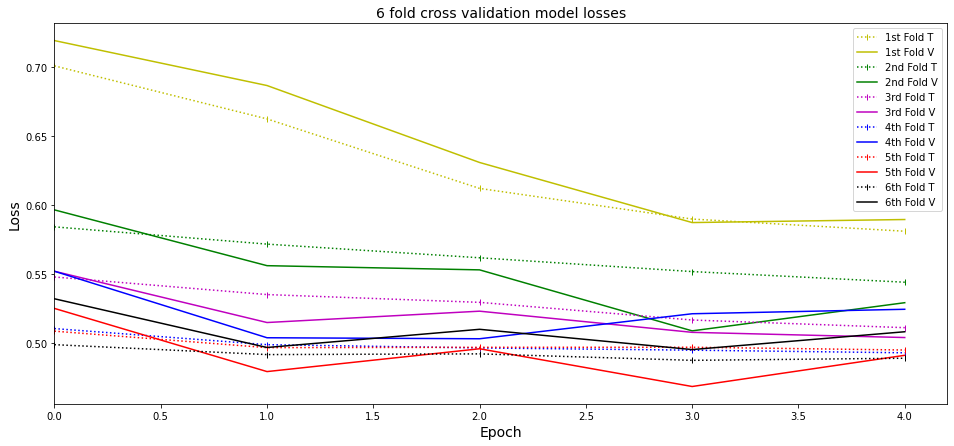

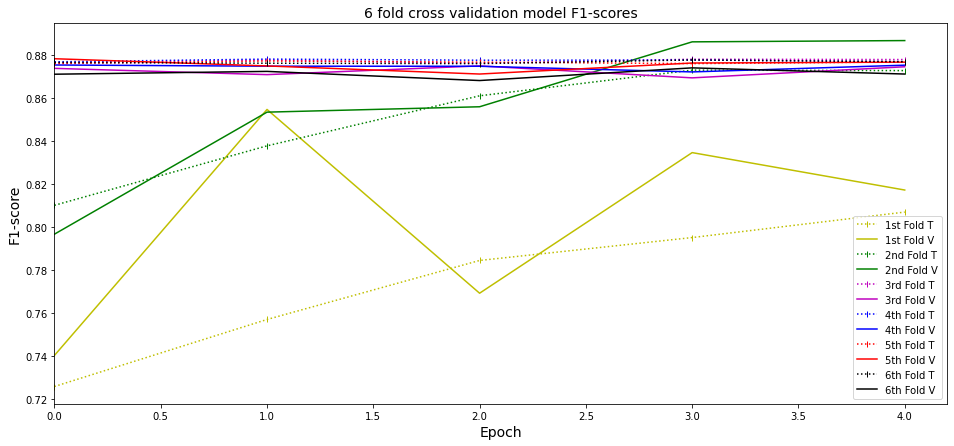

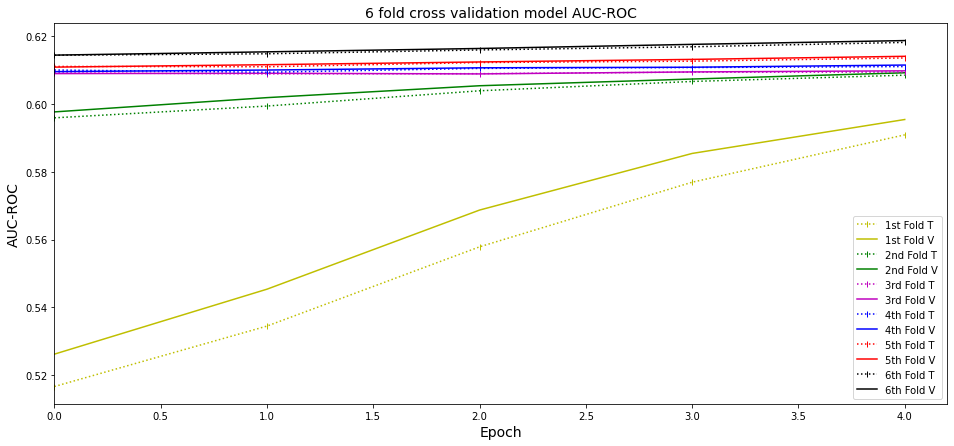





░░ ▒ ▒ █ █ Based on the monitoring criteria, 5th fold has the best val_loss with the value of 0.4682626485824585 █ █ ▒ ▒ ░░


In [ ]:
#@markdown ##Play the cell to visualise training history
from matplotlib import pyplot as plt
title_font = {'fontname':'Arial', 'size':'14'}

if (Use_K_Fold_Cross_Validation):
  best_metric_array = np.zeros(6)
  if (mymode == 'min'):
    for i, history in enumerate(kfold_histories):
      best_metric_array[i] = np.min(history.history['val_loss'])
      best_metric_array_id = np.argmin(best_metric_array)
  elif (monitoring_criteria == 'val_f1'):
    for i, history in enumerate(kfold_histories):
      best_metric_array[i] = np.max(history.history['val_f1'])
      best_metric_array_id = np.argmax(best_metric_array)
  else:
    for i, history in enumerate(kfold_histories):
      best_metric_array[i] = np.max(history.history['val_auc_roc'])
      best_metric_array_id = np.argmax(best_metric_array)
color_num = 0
colors = ['y', 'g', 'm', 'b', 'r', 'k']

if (Use_K_Fold_Cross_Validation):
    plt.figure(figsize=(16,7))
    for history in kfold_histories:
      plt.plot(history.history['loss'], colors[color_num] + '|:')
      plt.plot(history.history['val_loss'], colors[color_num])
      plt.title('6 fold cross validation model losses', **title_font)
      plt.ylabel('Loss', **title_font)
      plt.xlabel('Epoch', **title_font)
      color_num = color_num + 1
    plt.xlim(left=0)
    plt.legend(['1st Fold T', '1st Fold V', '2nd Fold T', '2nd Fold V', '3rd Fold T', '3rd Fold V', '4th Fold T', '4th Fold V', '5th Fold T', '5th Fold V' , '6th Fold T', '6th Fold V'], loc='best')
    plt.show()

    color_num = 0
    plt.figure(figsize=(16,7))
    for history in kfold_histories:
      plt.plot(history.history['f1'], colors[color_num] + '|:')
      plt.plot(history.history['val_f1'], colors[color_num])
      plt.title('6 fold cross validation model F1-scores', **title_font)
      plt.ylabel('F1-score', **title_font)
      plt.xlabel('Epoch', **title_font)
      color_num = color_num + 1
    plt.xlim(left=0)
    plt.legend(['1st Fold T', '1st Fold V', '2nd Fold T', '2nd Fold V', '3rd Fold T', '3rd Fold V', '4th Fold T', '4th Fold V', '5th Fold T', '5th Fold V', '6th Fold T', '6th Fold V'], loc='best')
    plt.show()

    color_num = 0
    plt.figure(figsize=(16,7))
    for history in kfold_histories:
      plt.plot(history.history['auc_roc'], colors[color_num] + '|:')
      plt.plot(history.history['val_auc_roc'], colors[color_num])
      plt.title('6 fold cross validation model AUC-ROC', **title_font)
      plt.ylabel('AUC-ROC', **title_font)
      plt.xlabel('Epoch', **title_font)
      color_num = color_num + 1
    plt.xlim(left=0)
    plt.legend(['1st Fold T', '1st Fold V', '2nd Fold T', '2nd Fold V', '3rd Fold T', '3rd Fold V', '4th Fold T', '4th Fold V', '5th Fold T', '5th Fold V', '6th Fold T', '6th Fold V'], loc='best')
    plt.show()

    print('\n\n\n')
    print('░░ ▒ ▒ █ █ ' + 'Based on the monitoring criteria, ' + printstatus_dic[str(best_metric_array_id+1)] + ' fold has the best ' + monitoring_criteria + ' with the value of ' + str(best_metric_array[best_metric_array_id]) +' █ █ ▒ ▒ ░░')

else:
  plt.figure(figsize=(16,5))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss', **title_font)
  plt.ylabel('Loss', **title_font)
  plt.xlabel('Epoch', **title_font)
  plt.legend(['Train', 'Validation'], loc='best')
  plt.xlim(left=0)
  plt.show()

  plt.figure(figsize=(16,5))
  plt.plot(history.history['f1'])
  plt.plot(history.history['val_f1'])
  plt.title('Model F1-score', **title_font)
  plt.ylabel('F1-score', **title_font)
  plt.xlabel('Epoch', **title_font)
  plt.legend(['Train', 'Validation'], loc='best')
  plt.xlim(left=0)
  plt.show()

  plt.figure(figsize=(16,5))
  plt.plot(history.history['auc_roc'])
  plt.plot(history.history['val_auc_roc'])
  plt.title('Model AUC-ROC', **title_font)
  plt.ylabel('AUC-ROC', **title_font)
  plt.xlabel('Epoch', **title_font)
  plt.legend(['Train', 'Validation'], loc='best')
  plt.xlim(left=0)
  plt.show()

# **5. Use the network**

---
<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **5.1. Network selection for inference**
---

<font size = 4>The current network (from section 4.1) can now be used to process images. If you want to use a network other than current network, for example if you have trained with `U-net` and want to predict using `VGG`, untick the **Use_the_current_network** box and select `VGG` from the list **Select_the_network**.

<font size = 5>**Caution!** 

<font size = 4>If you are changing the network, you must uncheck the **Use_the_current_trained_model** in section 5.2 and specify the **inference_model_name** and **inference_model_path** corresponding to a pre-trained network for instance `VGG` in this case as if you have selected from the list. 

<font size = 4> This is useful when you want to infer the results from a previously pre-trained model and you don't want to re-train again on the new dataset.

In [ ]:
#@markdown ###Select the deep learning network for inference:
Use_the_current_network = True #@param {type:"boolean"}
#@markdown ####Or uncheck the box above and select the desired network from the list below and then click to play:

Select_the_network = 'EM-Net V1 2X' #@param [' ', "EM-Net V1 BN", "EM-Net V1 BN 2X", "EM-Net V1 2X", "EM-Net V1 4X", "EM-Net V2", "EM-Net V2 2X", "EM-Net V2 4X", "ResNet", "SegNet", "U-Net", "U-Net BN", "VGG"] {type:"string"}

if (Use_the_current_network):
  model = mymodel_dic[mymodel]

if (not Use_the_current_network):
  if (Select_the_network == ' '):
    raise ValueError('Network not selected! Select the network from the list.')
  else:
    mymodel_dic = {"EM-Net V1 BN": V1BN(), 
               "EM-Net V1 BN 2X": V1BN2X(), 
               "EM-Net V1 2X": V12X(), 
               "EM-Net V1 4X": V14X(), 
               "EM-Net V2": V2, 
               "EM-Net V2 2X": V22X(), 
               "EM-Net V2 4X": V24X(), 
               "ResNet": RESNET(), 
               "SegNet": SEGNET(), 
               "U-Net": UNET(), 
               "U-Net BN": UNETBN(),
               "VGG": VGG()
               }
    model = mymodel_dic[Select_the_network]

## **5.2. Generate prediction from test dataset**
---

<font size = 4>The current trained model (from section 4.1) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder.

<font size = 4>**`Test_data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

<font size = 4> **Troubleshooting:** If there is a low contrast image warning when saving the images, this may be due to overfitting of the model to the data. It may result in images containing only a single colour. Train the network again with different network hyperparameters.

saving test patches in progress ...
number of patches per image: 4
saving completed!
Test data shape is: 
 (120, 256, 256, 1) 

120/120 [==============================] - 6s 53ms/step
saving completed!


Text(0.5, 1.0, 'Prediction')

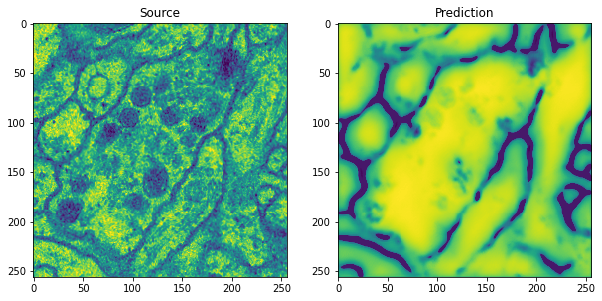

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os
from skimage.io import imread_collection


#We define the patch width and height to train the networks using extracted patches
Patch_test = base_directory+'/'+'Patch_test'

#Cleaning up pre-existing directories, if any!
if os.path.exists(Patch_test):
  shutil.rmtree(Patch_test)

#Creating new directories
os.mkdir(Patch_test)


#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.
Test_data_folder = '/content/gdrive/My Drive/Zero/TestISBI' #@param {type:"string"}

Results_folder = '/content/gdrive/My Drive/Zero/ResultsISBI' #@param {type:"string"}


images___ = os.listdir(Test_data_folder)
I___ = io.imread(Test_data_folder+'/'+images___[0])

patches_list = []
#Read images from sources
for file in os.listdir(Test_data_folder):
  img = io.imread(os.path.join(Test_data_folder, file),as_gray=True)
  patches_list.append(img)
parent_patches_test = np.asarray(patches_list).astype('uint8')

del patches_list

#Extract patches and save!!! 
print('saving test patches in progress ...')
for i,item in enumerate(extract_ordered(parent_patches_test, Patch_width, Patch_height)):
    newimage = item.reshape(Patch_width,Patch_height)
    newimage = PIL.Image.fromarray(newimage.astype('uint8'), mode='L')
    newimage.save(os.path.join(Patch_test,"%d_test.png"%i))
print('saving completed!')

#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = False #@param {type:"boolean"}
#@markdown ---
#@markdown ####If you have trained on K-fold validation setting, do you want to use ensemble of top models? Select models:
Use_ensemble_of_models = True #@param {type:"boolean"}
First_Fold = False #@param {type:"boolean"}
Second_Fold = True #@param {type:"boolean"}
Third_Fold = True #@param {type:"boolean"}
Fourth_Fold = False #@param {type:"boolean"}
Fifth_Fold = True #@param {type:"boolean"}
Sixth_Fold = False #@param {type:"boolean"}
if (Use_the_current_trained_model and Use_ensemble_of_models):
  raise ValueError('Select only one method for inference. Methods of inference cannot coexist!')

#@markdown ---
#@markdown ###If not, please provide the name of the model and path to model folder:
#@markdown #####During training, the model files are automatically saved inside a folder named after the parameter 'model_name' (see section 3). Provide the name of this folder as 'inference_model_name' and the path to its parent folder in 'inference_model_path'. 

inference_model_name = '' #@param {type:"string"}

inference_model_path = "" #@param {type:"string"}

# testGen = testGenerator(Test_data_folder)

#load the trained model
os.chdir(Results_folder)
# model = unet()


Test_data_folder = Patch_test

#Create a list of validation sources
source_dir_list = os.listdir(Test_data_folder)
num = len(source_dir_list)

path = Path(Test_data_folder)
base_directory = '/'+(str(path.parent))

Test_data_folder_ = os.path.basename(os.path.normpath(Test_data_folder))



#Image size
# images = os.listdir(base_directory+'/'+Test_data_folder_)
# I = imread(base_directory+'/'+Test_data_folder_+'/'+images[0])
# image_size = I.shape[0]

images = os.listdir(Test_data_folder)
I = imread(Test_data_folder+'/'+images[0])
image_size = I.shape[0]

Test_directory = Test_data_folder + '/*.' + source_dir_list[0].split('.')[1]   # Specify labels directory
Test_data = imread_collection(Test_directory)
Test_data = list(Test_data)
Test_data = np.asarray(Test_data)

imgs_std__ = np.std(Test_data)
imgs_mean__ = np.mean(Test_data)
Test_data = (Test_data - imgs_mean__)/imgs_std__
Test_data = np.reshape(Test_data, (num, image_size, image_size, 1)).astype('float32')
print('Test data shape is: \n', np.shape(Test_data), '\n')

if Use_the_current_trained_model == True:
  if (Use_K_Fold_Cross_Validation):
    mypath7 = base_directory + '/KFOLD/Models'
    model.load_weights(mypath7+'/'+'KFOLD'+str(best_metric_array_id+1)+'.hdf5')
    results = model.predict(Test_data, batch_size=batch_size, verbose=1)
  else:
    os.chdir(model_path)
    model.load_weights(model_name+".hdf5")
    results = model.predict(Test_data, batch_size=batch_size, verbose=1)
  for i,item in enumerate(results):
    newimage = item.reshape(image_size,image_size)
    newimage = Image.fromarray(newimage)
    newimage.save(os.path.join(Results_folder,"%d_predict.tif"%i))
  print('saving completed!')
elif (Use_ensemble_of_models):
  e = []
  mypath6 = base_directory + '/KFOLD/Models'
  mydic = {0: '1', 1: '2', 2: '3', 3:'4', 4:'5', 5: '6'}
  user_models_4_ensemble = [First_Fold, Second_Fold, Third_Fold, Fourth_Fold, Fifth_Fold, Sixth_Fold]
  for i, item in enumerate(user_models_4_ensemble):
    if (item):
      model.load_weights(mypath6+'/'+'KFOLD'+mydic[i]+'.hdf5')
      results = model.predict(Test_data, batch_size=batch_size, verbose=1)
      e.append(results)
  d = np.zeros((1, image_size, image_size, 1))
  s = np.zeros((e[0].shape))
  for j in range(e[0].shape[0]):
    for item in e:
      d = np.vstack((d, item[j].reshape(1,image_size,image_size,1)))
    d = np.delete(d,0,0)
    d = np.mean(d, axis = 0)
    s[j] = d
    d = np.zeros((1,image_size,image_size,1))
  for i,item in enumerate(s):
    newimage = item.reshape(image_size,image_size)
    newimage = Image.fromarray(newimage)
    newimage.save(os.path.join(Results_folder,"%d_predict.tif"%i))
  print('saving completed!')
else:
  os.chdir(inference_model_path)
  model.load_weights(inference_model_name+".hdf5")
  results = model.predict(Test_data, batch_size=batch_size, verbose=1)
  for i,item in enumerate(results):
    newimage = item.reshape(image_size,image_size)
    newimage = Image.fromarray(newimage)
    newimage.save(os.path.join(Results_folder,"%d_predict.tif"%i))
  print('saving completed!')

Test_data_4plot = imread_collection(Test_directory)
Test_data_4plot = list(Test_data_4plot)
Test_data_4plot = np.asarray(Test_data_4plot)[0]

f=plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(Test_data_4plot, interpolation='nearest')
plt.title('Source')

plt.subplot(1,2,2)
plt.imshow(results[0].reshape(image_size, image_size), interpolation='nearest')
plt.title('Prediction')

